#Project Description

This project aims to

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Capstone

/content/drive/MyDrive/Capstone


In [3]:
!ls

DataForML.csv	       DataForML.pkl	    test-data.csv
DataForML_Numeric.pkl  Final_XGB_Model.pkl  train-data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

Step 1: Reading the data with python

In [5]:
#supressing warning messages
warnings.filterwarnings('ignore')

In [6]:
train_data = pd.read_csv("/content/drive/MyDrive/Capstone/train-data.csv")

#drop duplicates
train_data = train_data.drop_duplicates()

train_data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


Key observation:

Name: The name of the car including company and model

Location: The location in which the car is being sold

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Year: The year or edition of the model.

mileage: The standard mileage offered by the car company in kmpl or km/kg


Kilometers_Driven:
The total kilometres driven in the car by the previous owner(s) in KM.

Transmission:
The type of transmission used by the
car. (Automatic / Manual)

The type of fuel used by the car. (Petrol / Diesel / Electric / CNG / LPG)

Engine: The year or edition of the model.

Power: The horsepower of the car

Seats: The seat capacity

Price: The price for the car

New_Price: The new price for the car




# Problem Statement Definition
Objective: Creating a prediction model to predict the price of a car

Target Variable - Price predictors:
 - Kilometers Driven
 - Fuel Type
 - Mileage
 - Engine
 - Power
 - Seats
 - Fuel_Type
 - Year


# Identifying the problem and target variables

Based on the problem statement we need to create supervised ML Regression problem as the target variable is continuous

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<Axes: >

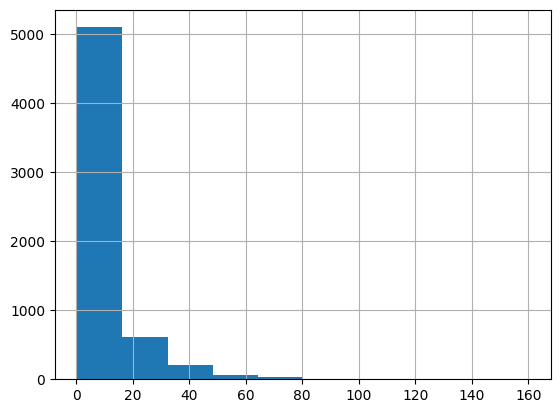

In [8]:
train_data['Price'].hist()

From Observation, the data is a bit skewed, hence a log transformation can be used to normalise data. When the prediction is made, they are de-log into original price. This helps the data to be more distributed in a curve bell

The data is also added by 1, to prevent log value to be below 0 since there are data with price lower than 1

In [9]:
train_data['Price'] = np.log(train_data['Price'] + 1)

<Axes: >

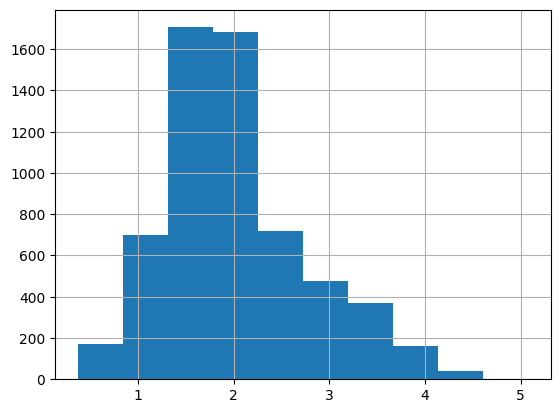

In [10]:
train_data['Price'].hist()

#Basic Explanatory

In [11]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.011601
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,2.602690
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,1.704748
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,1.945910
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,2.930660


# Data exploration

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [13]:
train_data.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,2.018429
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,0.748221
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.364643
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.504077
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.893112
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,2.393339


In [14]:
train_data.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

Selected Continuous variables:

 - Power
 - Engine
 - Price: Target of class variable
 - Kilometers Driven
 - Mileage

Selected Category variable:
 - Year
 - Seats
 - Fuel_Type

# Transform data

Removing unwanted columns
At first glance, column 'Unnamed: 0' (supposedly be ID/index column) and New_Price are removed, since New_Price contains mostly "null" values and the dataframe already has an ID column.

In [15]:
train_data = train_data.drop(['Unnamed: 0', 'New_Price'], axis=1)

Name are split into Brand and Model since they can be used for categorical data types and has format of Brand as first word and then the rest of name is Model

Column "Name" is then deleted

In [16]:
#Split Name into 2 columns Brand and Model
train_data[['Brand','Model']] = train_data['Name'].str.split(' ', n=1, expand=True)
train_data.drop('Name', axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  Model              6019 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 658.5+ KB


The amount of unique values inside a data is then listed inorder to determine if the variables are continuous or categorical

Categorical data has values within "listable" range, usually maximum 30 within this case. Higher data might have higher range
Continuous data has different value and varies within given range but can varies to more than thousands

In [17]:
train_data.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
Brand                  31
Model                1876
dtype: int64

In this case, Model as though can be categorical data since cars can have same model, however the range is too large comparing to other datatypes, hence it's invalid regarding graphing and processing.

In [18]:
train_data.drop('Model', axis=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.011601,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.602690,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.704748,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.945910,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.930660,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,1.749200,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,1.609438,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,1.360977,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,1.294727,Maruti


This functions is used to count the number of values in a categorical column and assign them to a number for counting within a dictionary.
Encode() then use the dictionary to change the data within the columns into numerical.
This is to avoid the creation of many other unecessary columns from get_dummies, which is used later in converting data into numerical.

In [19]:
#Make a counting value for brand
def Data_Counter(column):
  Data = {}
  counter = 0

  for value in train_data[column]:
    if value in Data:
      value = Data[value]
    else:
      Data[value] = counter
      counter += 1
  return Data

Brand = Data_Counter('Brand')
Location = Data_Counter('Location')

In [20]:
def encode(data):
    data_encoded = data.replace({
    'Owner_Type': {'First': 0, 'Second': 1,'Third':2,'Fourth & Above':3},
    'Transmission': {'Manual': 0, 'Automatic': 1},
    'Fuel_Type': {'Diesel': 0, 'Petrol': 1,'CNG':2,'LPG':3 ,'Electric':4 },
    'Brand': Brand,
    'Location': Location
})
    return data_encoded

train_data = encode(train_data)

#Removes Missing Data

After the data have been observed, it is time for a

In [21]:
train_data = train_data.dropna()

train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,0,2010,72000,2,0,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.011601,0,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,1,2015,41000,0,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.602690,1,Creta 1.6 CRDi SX Option
2,Honda Jazz V,2,2011,46000,1,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.704748,2,Jazz V
3,Maruti Ertiga VDI,2,2012,87000,0,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.945910,0,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,0,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.930660,3,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,8,2014,27365,0,0,0,28.4 kmpl,1248 CC,74 bhp,5.0,1.749200,0,Swift VDI
6015,Hyundai Xcent 1.1 CRDi S,5,2015,100000,0,0,0,24.4 kmpl,1120 CC,71 bhp,5.0,1.609438,1,Xcent 1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,5,2012,55000,0,0,1,14.0 kmpl,2498 CC,112 bhp,8.0,1.360977,13,Xylo D4 BSIV
6017,Maruti Wagon R VXI,7,2013,46000,1,0,0,18.9 kmpl,998 CC,67.1 bhp,5.0,1.294727,0,Wagon R VXI


In [22]:
train_data['Power'].value_counts()[:10]
train_data = train_data[train_data['Power'] != "null bhp"]
train_data = train_data.reset_index(drop=True)
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,0,2010,72000,2,0,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.011601,0,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,1,2015,41000,0,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.602690,1,Creta 1.6 CRDi SX Option
2,Honda Jazz V,2,2011,46000,1,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.704748,2,Jazz V
3,Maruti Ertiga VDI,2,2012,87000,0,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.945910,0,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,0,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.930660,3,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,8,2014,27365,0,0,0,28.4 kmpl,1248 CC,74 bhp,5.0,1.749200,0,Swift VDI
5868,Hyundai Xcent 1.1 CRDi S,5,2015,100000,0,0,0,24.4 kmpl,1120 CC,71 bhp,5.0,1.609438,1,Xcent 1.1 CRDi S
5869,Mahindra Xylo D4 BSIV,5,2012,55000,0,0,1,14.0 kmpl,2498 CC,112 bhp,8.0,1.360977,13,Xylo D4 BSIV
5870,Maruti Wagon R VXI,7,2013,46000,1,0,0,18.9 kmpl,998 CC,67.1 bhp,5.0,1.294727,0,Wagon R VXI


In [23]:
def convert_unit(value):
    parts = value.split()  # Split the string into parts based on whitespace
    if len(parts) == 2:
        numeric_part = float(parts[0])  # Extract the numeric part (convert to float)
        unit = parts[1]  # Extract the unit part
        if unit == 'km/kg':
            converted_value = numeric_part * 1.4  # Conversion factor from B to A
            return f"{converted_value:.2f} kmpl"  # Format the converted value with 'A' unit
    return value  # Return the original value if no conversion is needed

# Apply the conversion function to the 'Value Unit' column
train_data['Mileage'] = train_data['Mileage'].apply(convert_unit)

train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,0,2010,72000,2,0,0,37.24 kmpl,998 CC,58.16 bhp,5.0,1.011601,0,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,1,2015,41000,0,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.602690,1,Creta 1.6 CRDi SX Option
2,Honda Jazz V,2,2011,46000,1,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.704748,2,Jazz V
3,Maruti Ertiga VDI,2,2012,87000,0,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.945910,0,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,0,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.930660,3,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,8,2014,27365,0,0,0,28.4 kmpl,1248 CC,74 bhp,5.0,1.749200,0,Swift VDI
5868,Hyundai Xcent 1.1 CRDi S,5,2015,100000,0,0,0,24.4 kmpl,1120 CC,71 bhp,5.0,1.609438,1,Xcent 1.1 CRDi S
5869,Mahindra Xylo D4 BSIV,5,2012,55000,0,0,1,14.0 kmpl,2498 CC,112 bhp,8.0,1.360977,13,Xylo D4 BSIV
5870,Maruti Wagon R VXI,7,2013,46000,1,0,0,18.9 kmpl,998 CC,67.1 bhp,5.0,1.294727,0,Wagon R VXI


In [24]:
def remove_unit(data):
  data['Mileage (kmpl)'] = data['Mileage'].str.split(' ',expand=True)[0]
  data['Power (bhp)'] = data['Power'].str.split(' ',expand=True)[0]
  data['Engine (CC)'] = data['Engine'].str.split(' ',expand=True)[0]

  data['Mileage (kmpl)'] = data['Mileage (kmpl)'].astype(float)
  data['Power (bhp)'] = data['Power (bhp)'].astype(float)
  data['Engine (CC)'] = data['Engine (CC)'].astype(float)

  data = data.drop(['Mileage', 'Power', 'Engine'], axis=1)
  return data

train_data = remove_unit(train_data)
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage (kmpl),Power (bhp),Engine (CC)
0,Maruti Wagon R LXI CNG,0,2010,72000,2,0,0,5.0,1.011601,0,Wagon R LXI CNG,37.24,58.16,998.0
1,Hyundai Creta 1.6 CRDi SX Option,1,2015,41000,0,0,0,5.0,2.602690,1,Creta 1.6 CRDi SX Option,19.67,126.20,1582.0
2,Honda Jazz V,2,2011,46000,1,0,0,5.0,1.704748,2,Jazz V,18.20,88.70,1199.0
3,Maruti Ertiga VDI,2,2012,87000,0,0,0,7.0,1.945910,0,Ertiga VDI,20.77,88.76,1248.0
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,0,1,1,5.0,2.930660,3,A4 New 2.0 TDI Multitronic,15.20,140.80,1968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,8,2014,27365,0,0,0,5.0,1.749200,0,Swift VDI,28.40,74.00,1248.0
5868,Hyundai Xcent 1.1 CRDi S,5,2015,100000,0,0,0,5.0,1.609438,1,Xcent 1.1 CRDi S,24.40,71.00,1120.0
5869,Mahindra Xylo D4 BSIV,5,2012,55000,0,0,1,8.0,1.360977,13,Xylo D4 BSIV,14.00,112.00,2498.0
5870,Maruti Wagon R VXI,7,2013,46000,1,0,0,5.0,1.294727,0,Wagon R VXI,18.90,67.10,998.0


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   int64  
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   int64  
 5   Transmission       5872 non-null   int64  
 6   Owner_Type         5872 non-null   int64  
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
 9   Brand              5872 non-null   int64  
 10  Model              5872 non-null   object 
 11  Mileage (kmpl)     5872 non-null   float64
 12  Power (bhp)        5872 non-null   float64
 13  Engine (CC)        5872 non-null   float64
dtypes: float64(5), int64(7), object(2)
memory usage: 642.4+ KB


# Visual Exploratory Data Analysis

In [26]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

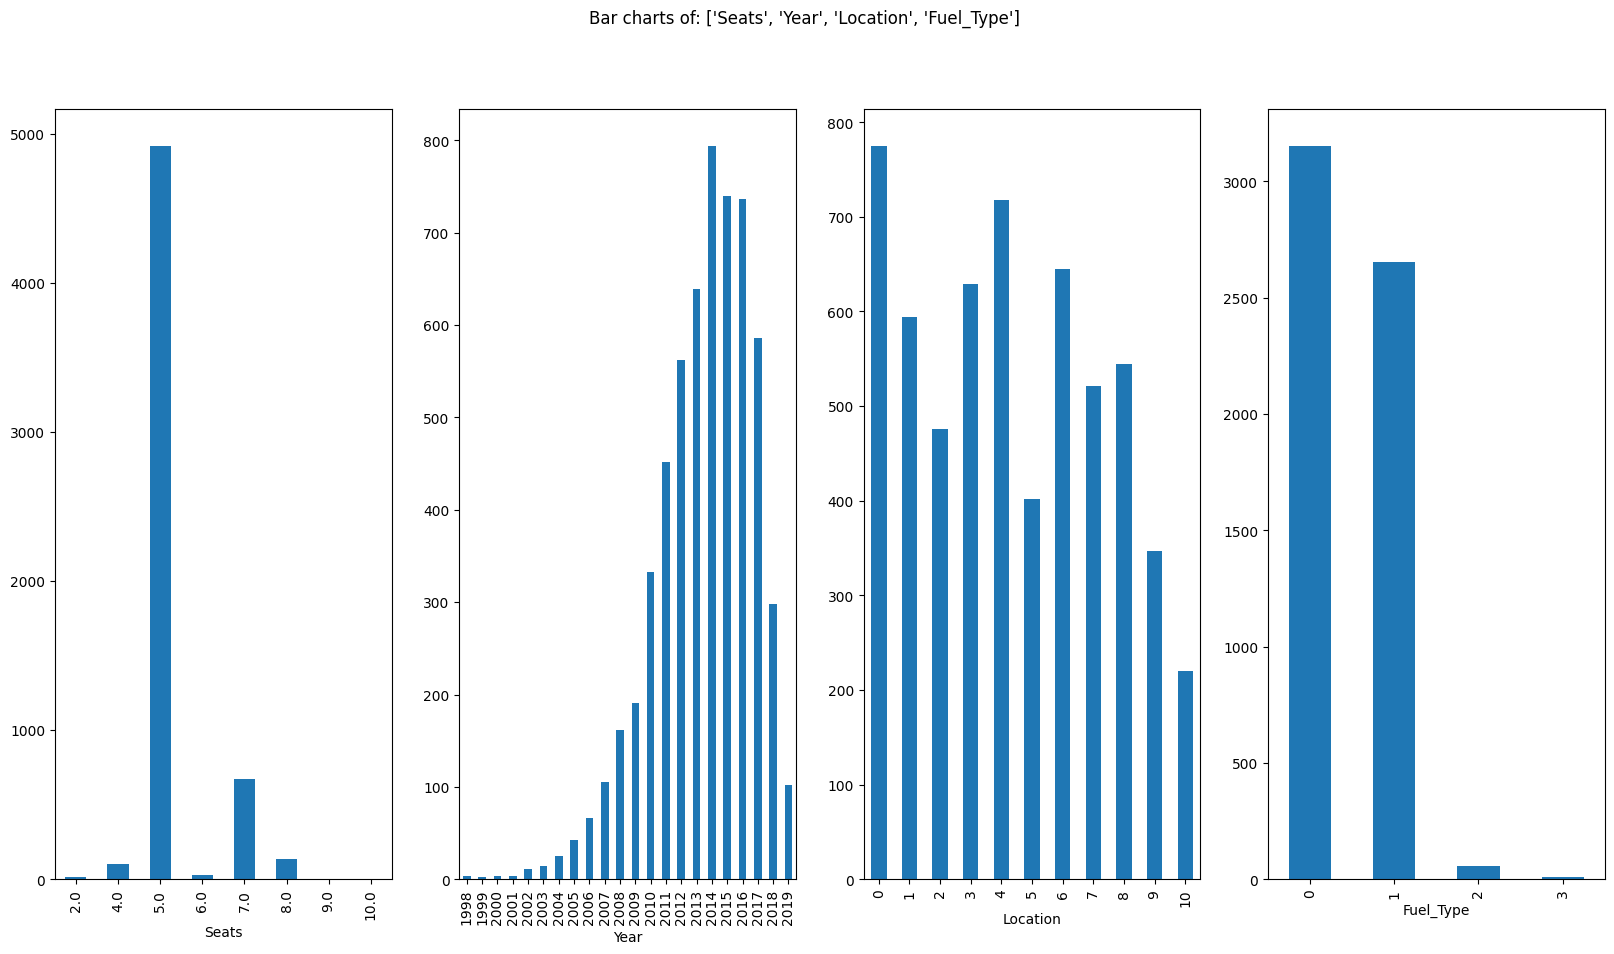

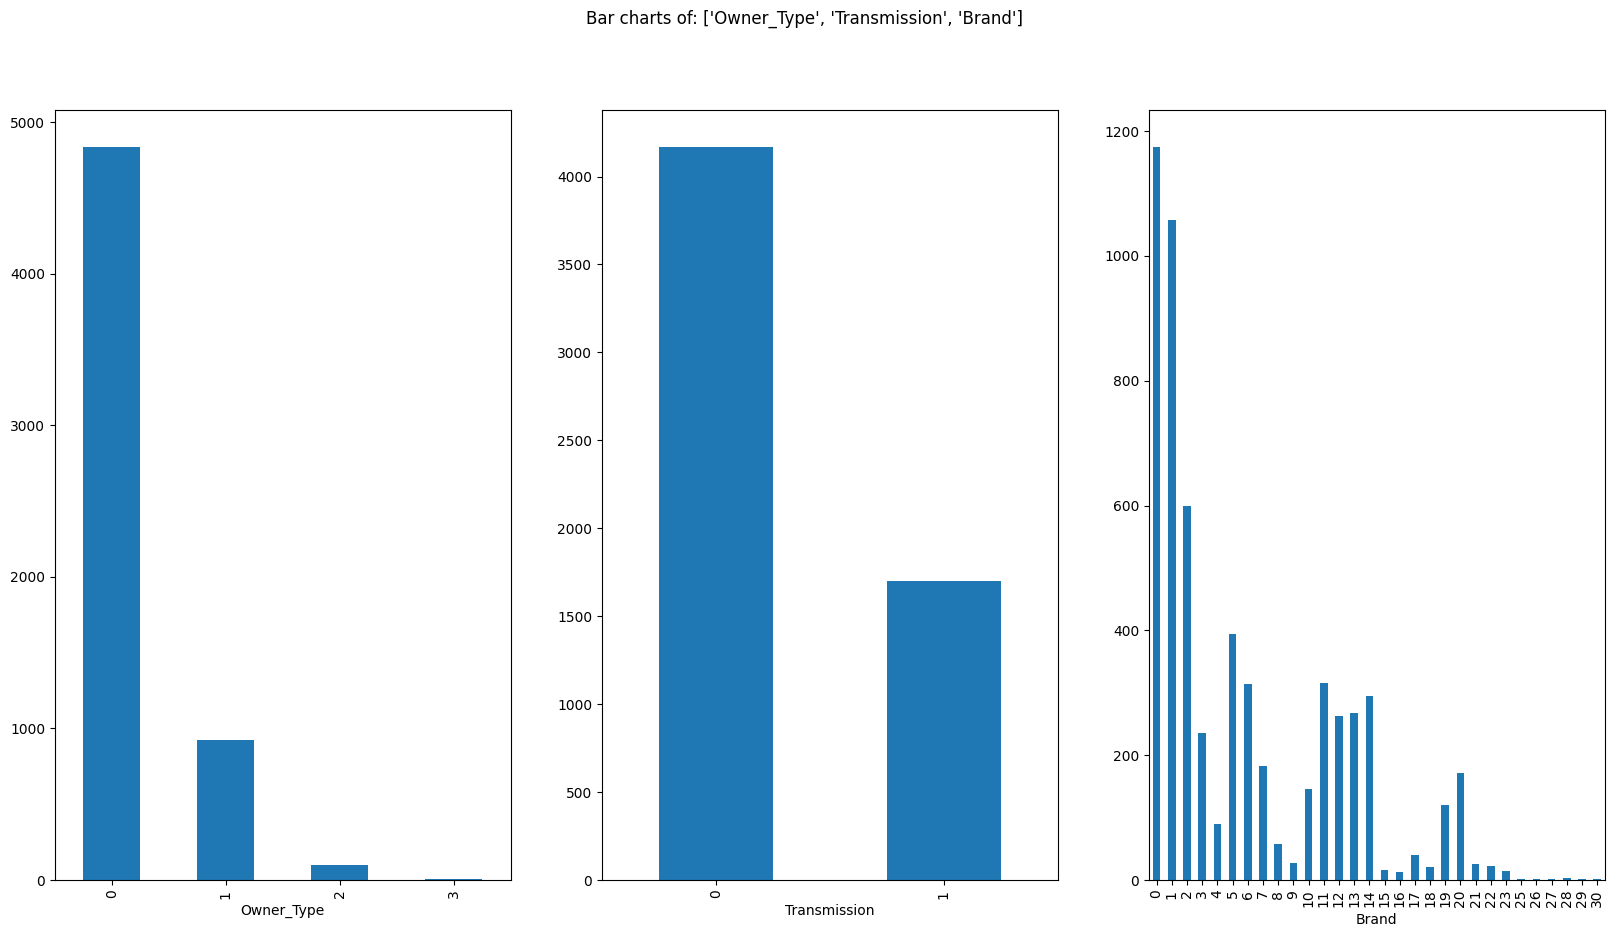

In [27]:
PlotBarCharts(train_data, ['Seats', 'Year', 'Location', 'Fuel_Type'])
PlotBarCharts(train_data, ['Owner_Type','Transmission', 'Brand'])


Removing data outliers since there are many non-frequent data from categorical variables

In [28]:
#dropping electric Fuel Type since it seems to be not frequent
train_data= train_data.drop(train_data[train_data['Fuel_Type'] == 3].index)
#Removes 10, 2, 9 from seats since they don't appear that frequent
train_data= train_data.drop(train_data[train_data['Seats'] == 10.0].index)
train_data= train_data.drop(train_data[train_data['Seats'] == 2.0].index)
train_data= train_data.drop(train_data[train_data['Seats'] == 9.0].index)

train_data= train_data.drop(train_data[train_data['Year'] == 1999].index)
#The 4 or above owner type is removed since its frequency is not mentionable
train_data= train_data.drop(train_data[train_data['Owner_Type'] == 3].index)
#Most of the brand from number 25 has extremely low frequencies
train_data= train_data.drop(train_data[train_data['Brand'] > 24].index)


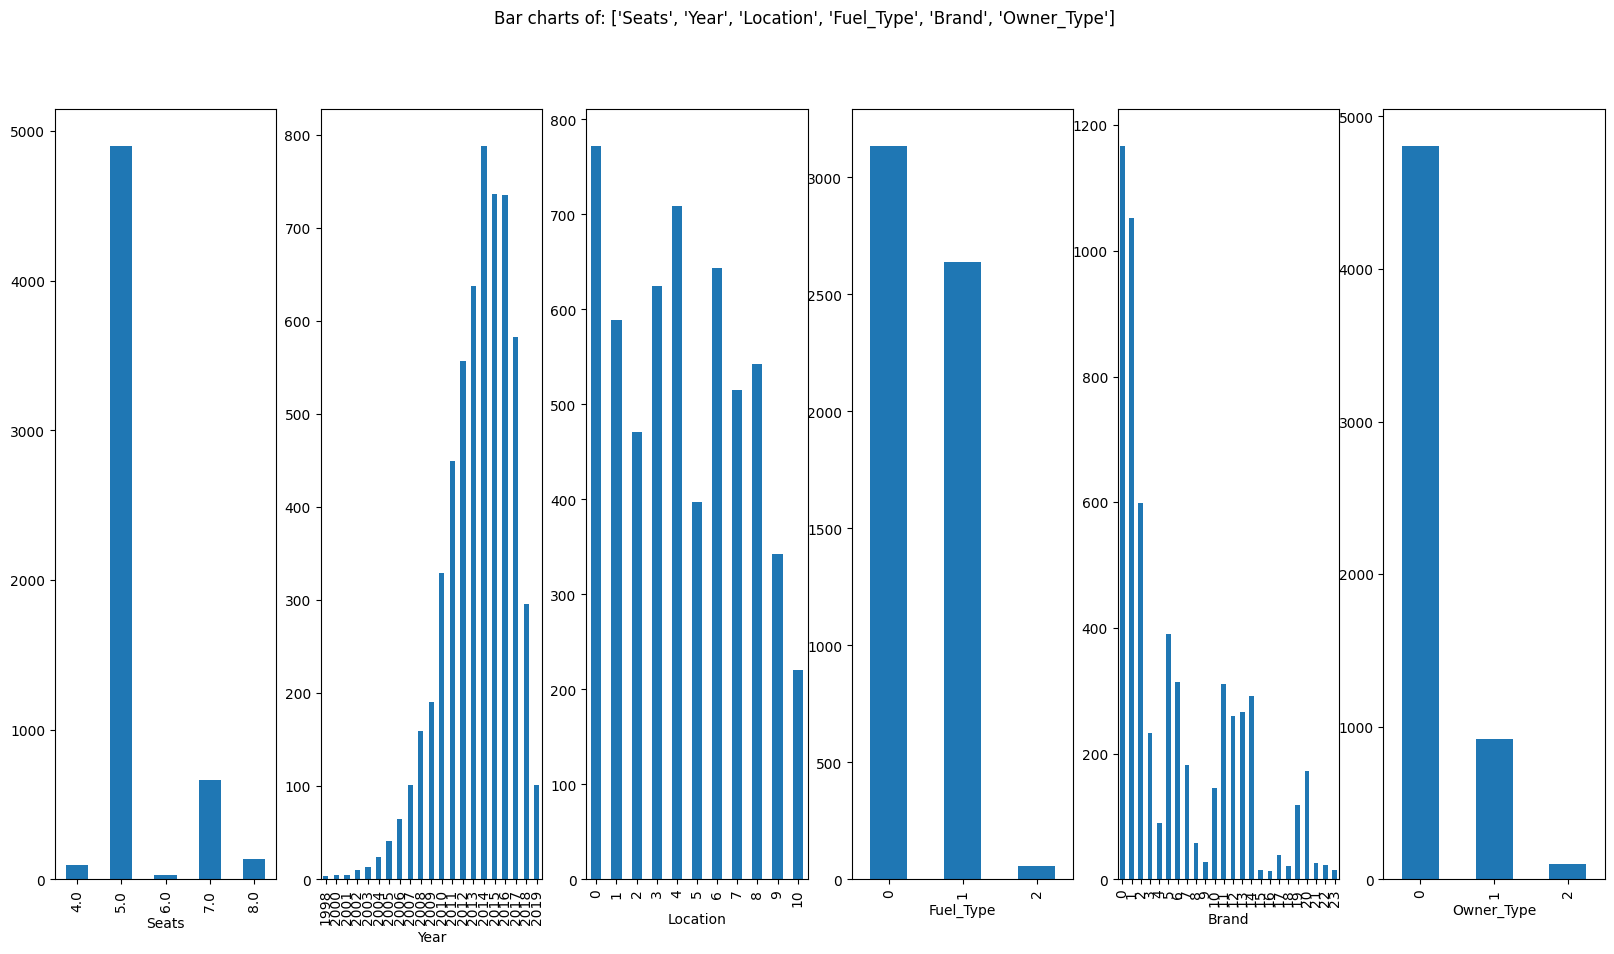

In [29]:
PlotBarCharts(train_data, ['Seats', 'Year', 'Location', 'Fuel_Type', 'Brand', 'Owner_Type'])

#Continuous data visualisation

First we draw histogram of all continuous values for better view at their range of values. Then we can decide to either remove or change the values into threshold to prevent loss of data.

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage (kmpl)'}>],
       [<Axes: title={'center': 'Power (bhp)'}>,
        <Axes: title={'center': 'Engine (CC)'}>]], dtype=object)

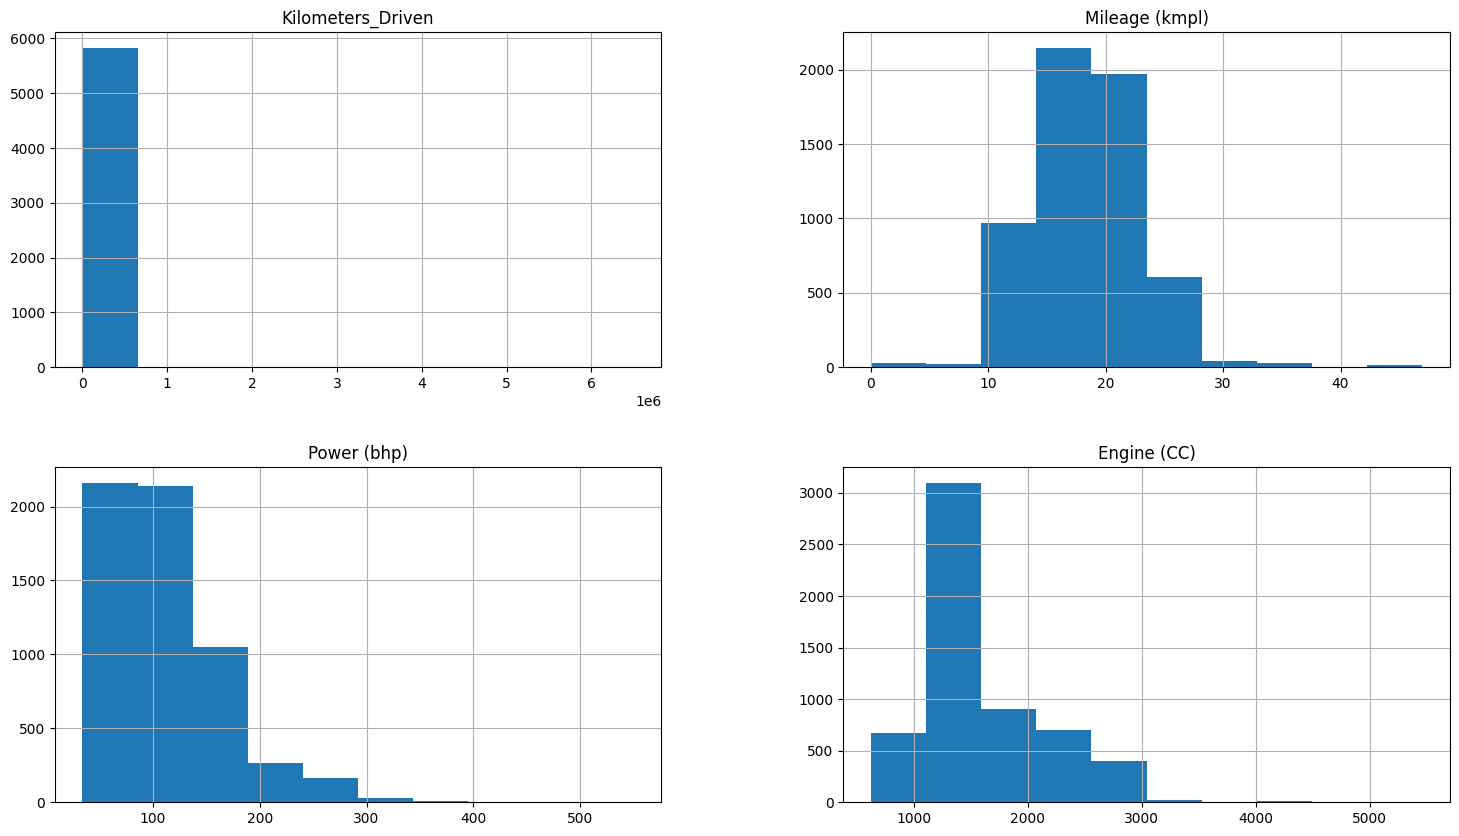

In [30]:
train_data.hist(['Kilometers_Driven','Mileage (kmpl)', 'Power (bhp)', 'Engine (CC)'], figsize=(18,10))

Observation: Most of the data are slightly moved to the left side and has outliers, hence first we can use z score method and removes the outlier farther from the main distribution range.
When the general distribution is done we use a more specific approach by changing the upper threshold of each column closed to their upper distribution range.

In [31]:
from scipy import stats
DataTypes = ["Kilometers_Driven","Mileage (kmpl)","Engine (CC)","Power (bhp)"]
for i in DataTypes:
  z = np.abs(stats.zscore(train_data[i]))
  for j in np.where(z>3):
   train_data[i][j] = np.nan
train_data = train_data.dropna()
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage (kmpl),Power (bhp),Engine (CC)
1,Hyundai Creta 1.6 CRDi SX Option,1,2015,41000.0,0,0,0,5.0,2.602690,1,Creta 1.6 CRDi SX Option,19.67,126.20,1582.0
2,Honda Jazz V,2,2011,46000.0,1,0,0,5.0,1.704748,2,Jazz V,18.20,88.70,1199.0
3,Maruti Ertiga VDI,2,2012,87000.0,0,0,0,7.0,1.945910,0,Ertiga VDI,20.77,88.76,1248.0
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670.0,0,1,1,5.0,2.930660,3,A4 New 2.0 TDI Multitronic,15.20,140.80,1968.0
6,Nissan Micra Diesel XV,5,2013,86999.0,0,0,0,5.0,1.504077,4,Micra Diesel XV,23.08,63.10,1461.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,8,2014,27365.0,0,0,0,5.0,1.749200,0,Swift VDI,28.40,74.00,1248.0
5868,Hyundai Xcent 1.1 CRDi S,5,2015,100000.0,0,0,0,5.0,1.609438,1,Xcent 1.1 CRDi S,24.40,71.00,1120.0
5869,Mahindra Xylo D4 BSIV,5,2012,55000.0,0,0,1,8.0,1.360977,13,Xylo D4 BSIV,14.00,112.00,2498.0
5870,Maruti Wagon R VXI,7,2013,46000.0,1,0,0,5.0,1.294727,0,Wagon R VXI,18.90,67.10,998.0


array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage (kmpl)'}>],
       [<Axes: title={'center': 'Power (bhp)'}>,
        <Axes: title={'center': 'Engine (CC)'}>]], dtype=object)

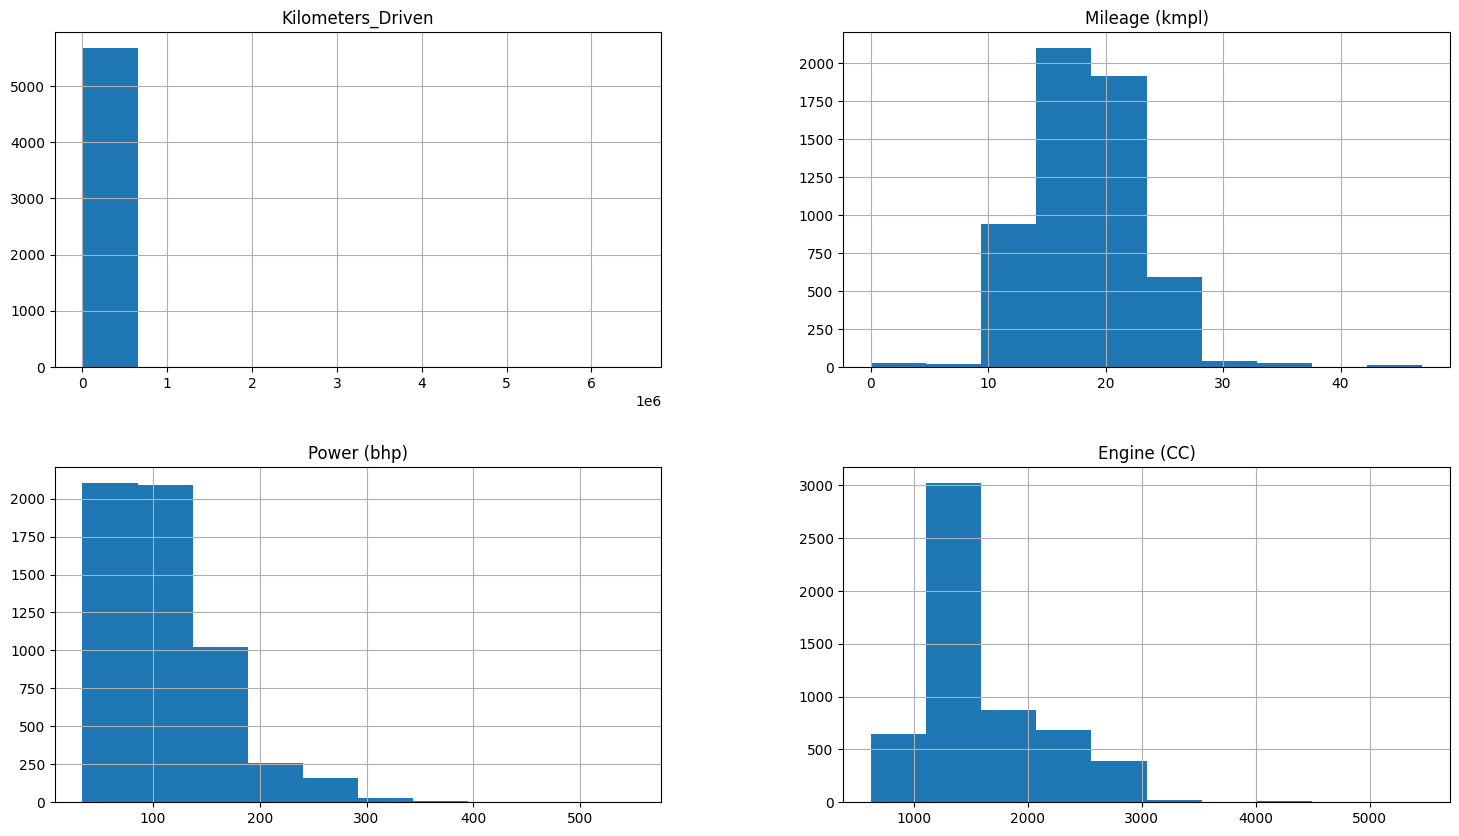

In [32]:
train_data.hist(['Kilometers_Driven','Mileage (kmpl)', 'Power (bhp)', 'Engine (CC)'], figsize=(18,10))

In [33]:
train_data = train_data.drop(train_data[train_data['Kilometers_Driven'] > 220000].index)
train_data = train_data.drop(train_data[train_data['Power (bhp)'] > 400].index)
train_data = train_data.drop(train_data[train_data['Engine (CC)'] > 4500].index)


array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage (kmpl)'}>],
       [<Axes: title={'center': 'Power (bhp)'}>,
        <Axes: title={'center': 'Engine (CC)'}>]], dtype=object)

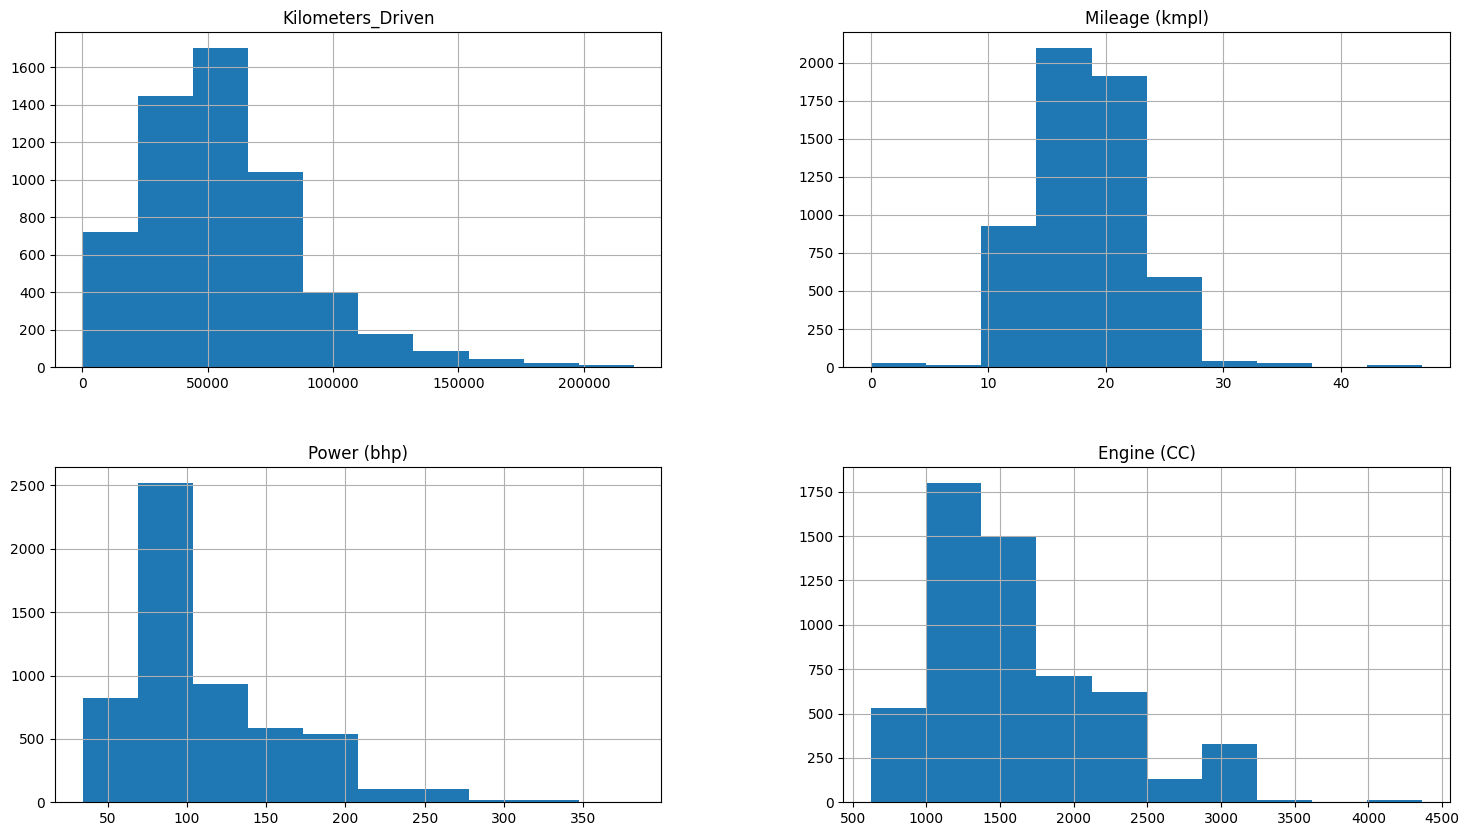

In [34]:
train_data.hist(['Kilometers_Driven','Mileage (kmpl)', 'Power (bhp)', 'Engine (CC)'], figsize=(18,10))

# Relationship explorations

Since the target variable is continuous, a fit observation model should be using scatterplot.
The variables for observations are : Engine, Power, Kilometer Driven, Mileage

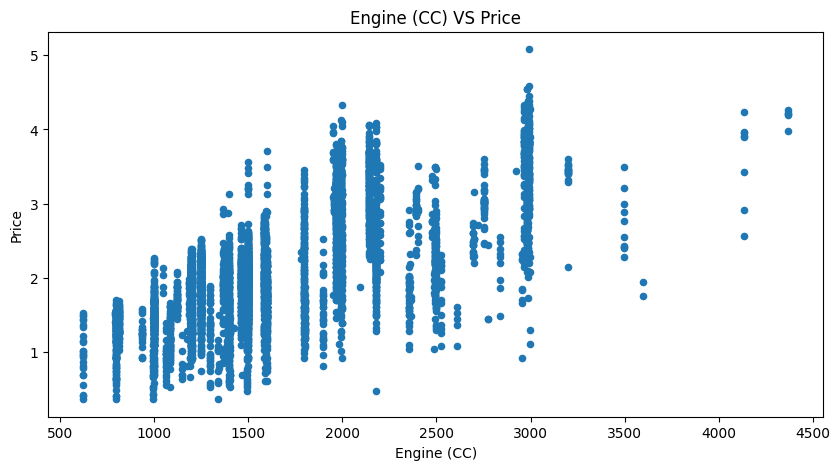

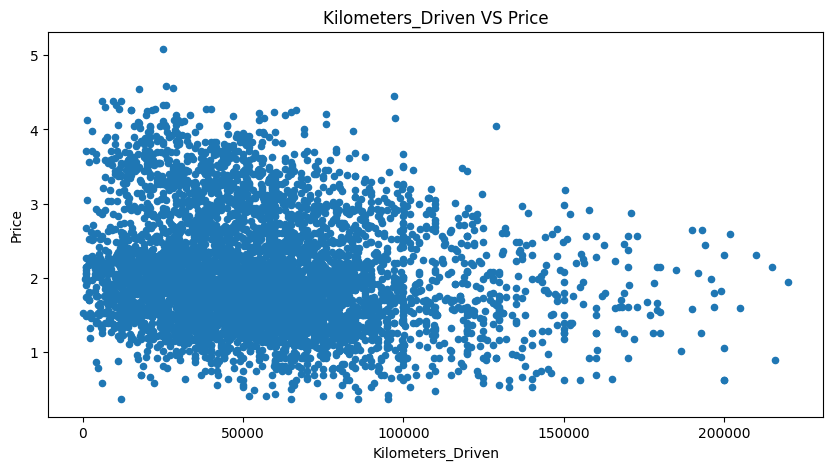

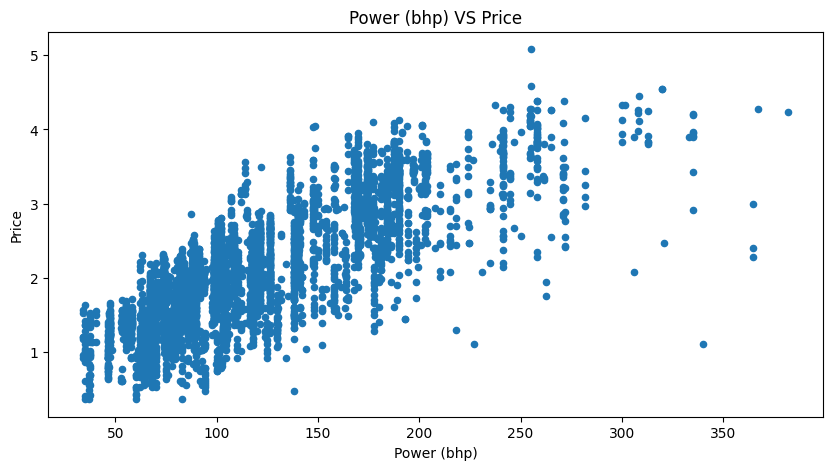

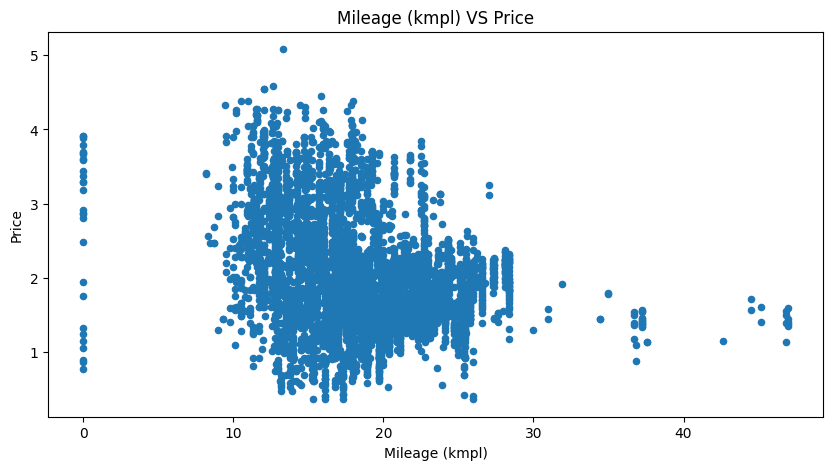

In [35]:
Continuous_col = ['Engine (CC)', 'Kilometers_Driven','Power (bhp)','Mileage (kmpl)']

for predictor in Continuous_col:
    train_data.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor + " VS "+ 'Price')

Observaton:
 - The higher The Power and Engine value, the higher the price range ->increasing trend
 - The higher Kilometers Driven, the lower the price -> decreasing trend
 - Mileage has no obvious trend

To furthermore confirming the importance of variables, we have a correlation test, which result in only Power and Engine have the correlation score above 0.5.


In [36]:
Continuous_col = ['Engine (CC)', 'Kilometers_Driven','Power (bhp)','Mileage (kmpl)', 'Price']

# Creating the correlation matrix
CorrelationData=train_data[Continuous_col].corr()
CorrelationData

,Engine (CC),Kilometers_Driven,Power (bhp),Mileage (kmpl),Price
Engine (CC),1.000000,0.203353,0.861713,-0.616993,0.700339
Kilometers_Driven,0.203353,1.000000,0.032204,-0.141774,-0.189199
Power (bhp),0.861713,0.032204,1.000000,-0.529370,0.795803
Mileage (kmpl),-0.616993,-0.141774,-0.529370,1.000000,-0.322543
Price,0.700339,-0.189199,0.795803,-0.322543,1.000000


In [37]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Engine (CC)    0.700339
Power (bhp)    0.795803
Price          1.000000
Name: Price, dtype: float64

Selected Variables: Power (bhp) and Engine (CC)
 - Engine (CC)
 - Power (bhp)

# Relationship: Categorical vs continuous

Box plots are then used for categorical and continuous variables

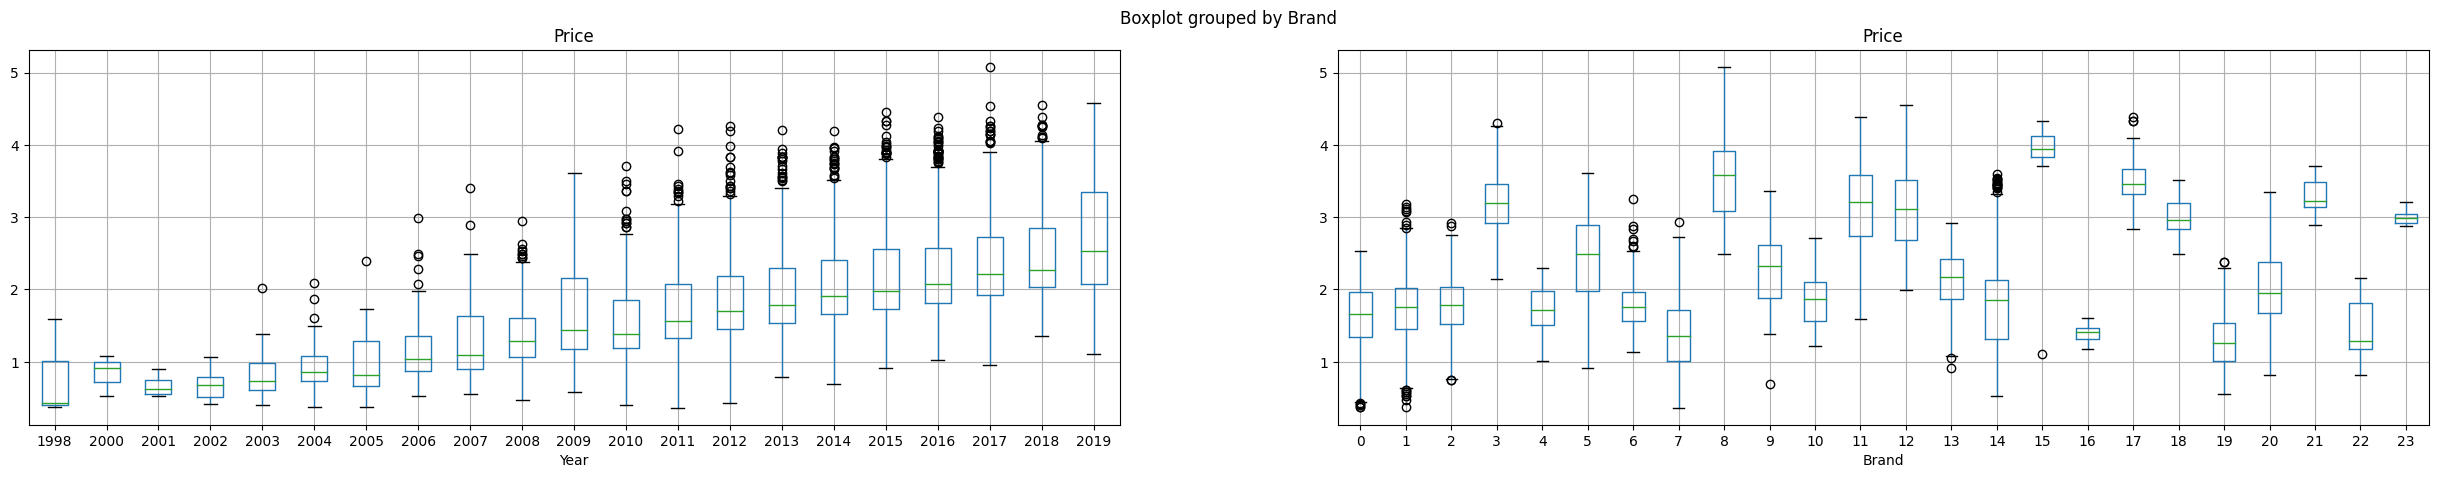

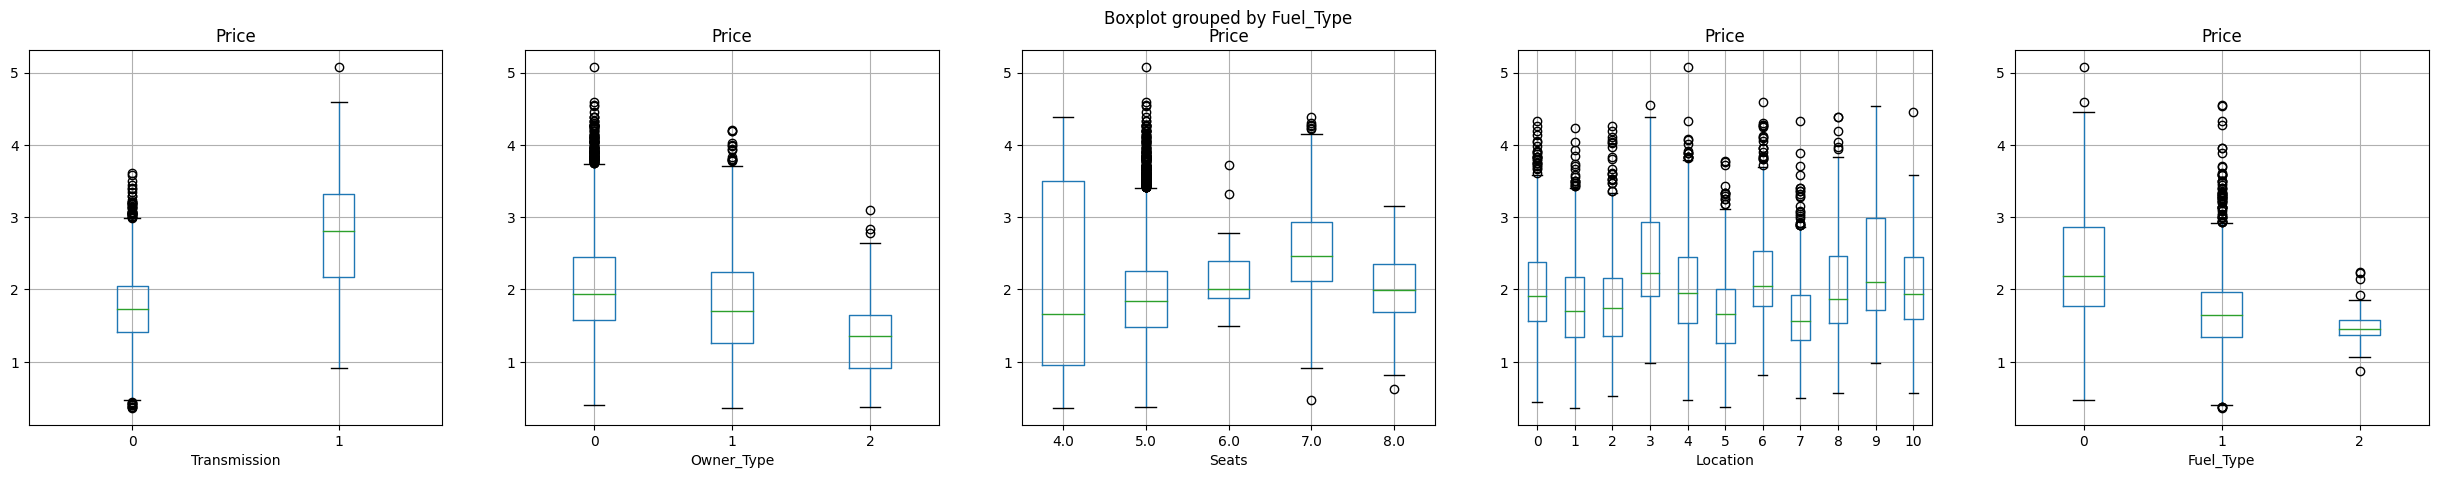

In [38]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
Categorical_col1 = ['Year',  'Brand']
Categorical_col2 = ['Transmission', 'Owner_Type','Seats', 'Location',  'Fuel_Type']

import matplotlib.pyplot as plt
fig1, PlotCanvas1 = plt.subplots(nrows=1, ncols=len(Categorical_col1), figsize=(30,5))

for PredictorCol , i in zip(Categorical_col1, range(len(Categorical_col1))):
    train_data.boxplot(column='Price', by=PredictorCol, figsize=(6,5), vert=True, ax=PlotCanvas1[i], layout='')


fig2, PlotCanvas2 = plt.subplots(nrows=1, ncols=len(Categorical_col2), figsize=(30,5))

for PredictorCol , i in zip(Categorical_col2, range(len(Categorical_col2))):
    train_data.boxplot(column='Price', by=PredictorCol, figsize=(6,5), vert=True, ax=PlotCanvas2[i], layout='')

Observation:
- Year, Fuel_Type, Transmission and Owner_Type shows clear trend in comparison to price.
To further confirm the correlation of the data to price, we use Analysis of Variance (ANOVA) method.
If the differences between model and price is very low, the correlation between them is verified.

In [39]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors = []

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        elif (AnovaResults[1] >= 0.05):
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [40]:
Categorical_list = ['Year',  'Brand', 'Transmission','Seats', 'Location',  'Fuel_Type','Owner_Type']

FunctionAnova(inpData=train_data, TargetVariable='Price',
              CategoricalPredictorList=Categorical_list)

##### ANOVA Results ##### 

Year is correlated with Price | P-Value: 2.0015158831635405e-278
Brand is correlated with Price | P-Value: 0.0
Transmission is correlated with Price | P-Value: 0.0
Seats is correlated with Price | P-Value: 1.4113867448268565e-81
Location is correlated with Price | P-Value: 3.3665870460179202e-124
Fuel_Type is correlated with Price | P-Value: 6.118207125940932e-273
Owner_Type is correlated with Price | P-Value: 1.2286172815776803e-39


['Year',
 'Brand',
 'Transmission',
 'Seats',
 'Location',
 'Fuel_Type',
 'Owner_Type']

Conclusion: all categorical variables are correlated with Target variable and they are selected


#Select final predictors/features
The selected variables are then used to train the model

In [41]:
Selected_col = ['Power (bhp)', 'Engine (CC)', 'Fuel_Type', 'Year',  'Brand', 'Transmission', 'Owner_Type','Seats', 'Location', 'Price']

DataForML = train_data[Selected_col]

DataForML.head()

,Power (bhp),Engine (CC),Fuel_Type,Year,Brand,Transmission,Owner_Type,Seats,Location,Price
1,126.20,1582.0,0,2015,1,0,0,5.0,1,2.602690
2,88.70,1199.0,1,2011,2,0,0,5.0,2,1.704748
3,88.76,1248.0,0,2012,0,0,0,7.0,2,1.945910
4,140.80,1968.0,0,2013,3,1,1,5.0,3,2.930660
6,63.10,1461.0,0,2013,4,0,0,5.0,5,1.504077


We then save the data for further usage, mostly for observing the data before converting to numerical data, hence why it's not in pickle

In [42]:
DataForML.to_csv('DataForML.csv')

Convert data to numeric

In [43]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price'] = train_data['Price']

# Printing sample rows
DataForML_Numeric.head()

,Power (bhp),Engine (CC),Fuel_Type,Year,Brand,Transmission,Owner_Type,Seats,Location,Price
1,126.20,1582.0,0,2015,1,0,0,5.0,1,2.602690
2,88.70,1199.0,1,2011,2,0,0,5.0,2,1.704748
3,88.76,1248.0,0,2012,0,0,0,7.0,2,1.945910
4,140.80,1968.0,0,2013,3,1,1,5.0,3,2.930660
6,63.10,1461.0,0,2013,4,0,0,5.0,5,1.504077


#Machine Learning Model development

We then save the file for further use, which will save time doing the steps above to convert the data into suitable train_data

In [44]:
DataForML_Numeric.to_pickle('DataForML_Numeric.pkl')

In [45]:
DataForML_Numeric.columns

Index(['Power (bhp)', 'Engine (CC)', 'Fuel_Type', 'Year', 'Brand',
       'Transmission', 'Owner_Type', 'Seats', 'Location', 'Price'],
      dtype='object')

In [46]:
TargetVariable='Price'
Predictors=['Power (bhp)', 'Engine (CC)', 'Fuel_Type', 'Year',  'Brand', 'Transmission', 'Owner_Type', 'Seats', 'Location']

#Setting up variables
X = DataForML_Numeric[Predictors].values
Y = DataForML_Numeric[TargetVariable].values


# Standardization/Normalisation

Normalisation is used for this linear regression model, since later on we do use KNN for regression model.

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Min_Max=MinMaxScaler()

# Generating the standardized values of X
X = Min_Max.fit_transform(X)

#Setting up train/test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4280)

In [48]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3950, 9)
(3950,)
(1694, 9)
(1694,)




# Multiple linear regression algorithm


In [49]:
from sklearn import metrics

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy scores are also taken for observation on model's effectiveness:
  - Absolute Percentage Error (APE) margin is taken by calculating the percentage of the difference between predicted and given price to given price
  - Mean and Median APE is also taken
  - a 10 cross validation test is also conducted to confirms the accuracy of the model throughout 10 test with randomly selected samples

In [50]:
def Display_Test_Result(Prediction):
  #Printing Prediction Values
  TestingDataResults = pd.DataFrame(data = X_test, columns=Predictors)
  TestingDataResults[TargetVariable] = np.round(np.exp(Y_test) - 1, 2)
  TestingDataResults[('Predicted '+ TargetVariable)] = np.round(np.exp(Prediction) - 1, 2)

  #Display the first 10 values of the result dataframe
  print(TestingDataResults.head(n = 10))

  #Calculating Error margin using absolute percentage error margin
  TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['Price']- TestingDataResults['Predicted Price']))/ TestingDataResults['Price'])

  MAPE = np.mean(TestingDataResults['APE'])
  MedianMAPE = np.median(TestingDataResults['APE'])


  # Custom Scoring Mean APE calculation
  Accuracy = 100 - MAPE
  MedianAccuracy = 100- MedianMAPE
  print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
  print('Median Accuracy on test data:', MedianAccuracy)

  #Calculate Accuracy
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

def Display_Accuracy(Model):
  # Custom Scoring MAPE calculation
  custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)
  #This display the accuracy values within a list for 10-times validation
  Accuracy_Values = cross_val_score(Model, X_train , Y_train, cv = 10, scoring=custom_Scoring)
  print('\n###########################################################')
  # Running 10-Fold Cross validation on a given algorithm
  # K-fold will split the data and automatically choose train/test samples
  print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
  #This is the mean accuracy from cross validation test
  print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
  print('\n###########################################################')


def display_result(Al_Model):
  ###########################################################################
  print('\n##### Model Validation and Accuracy Calculations ##########')
  # Printing all the parameters of Linear regression
  print(Al_Model)

  # Creating the model on Training Data
  Model = Al_Model.fit(X_train,Y_train)

  #Creating the prediction model
  Prediction_Model = Model.predict(X_test)

  Display_Test_Result(Prediction_Model)
  print('R^2 Value:',metrics.r2_score(Y_train, Model.predict(X_train)))

  Display_Accuracy(Al_Model)
  print('\n###########################################################')
  return Model

# LinearRegressionModel

In [51]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
Linear_Model = LinearRegression()

display_result(Linear_Model)


##### Model Validation and Accuracy Calculations ##########
LinearRegression()
   Power (bhp)  Engine (CC)  Fuel_Type      Year     Brand  Transmission  \
0     0.238930     0.233235        0.5  0.761905  0.086957           0.0   
1     0.156872     0.206252        0.0  0.761905  0.043478           0.0   
2     0.097182     0.207053        0.0  0.619048  0.608696           0.0   
3     0.060380     0.050761        0.5  0.809524  0.043478           0.0   
4     0.250431     0.258349        0.5  0.761905  0.043478           0.0   
5     0.198390     0.260486        0.5  0.619048  0.043478           0.0   
6     0.264865     0.255944        0.0  0.666667  0.043478           0.0   
7     0.393329     0.629976        0.0  0.666667  0.217391           0.0   
8     0.246694     0.415442        0.0  0.571429  0.565217           0.0   
9     0.386141     0.629976        0.0  0.904762  0.217391           0.0   

   Owner_Type  Seats  Location  Price  Predicted Price  
0         0.0   0.25      

LinearRegression()

#AdaBoost Algorithm for ML/AI model

In [52]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=3)
AB = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

AB_Model = display_result(AB)


##### Model Validation and Accuracy Calculations ##########
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
   Power (bhp)  Engine (CC)  Fuel_Type      Year     Brand  Transmission  \
0     0.238930     0.233235        0.5  0.761905  0.086957           0.0   
1     0.156872     0.206252        0.0  0.761905  0.043478           0.0   
2     0.097182     0.207053        0.0  0.619048  0.608696           0.0   
3     0.060380     0.050761        0.5  0.809524  0.043478           0.0   
4     0.250431     0.258349        0.5  0.761905  0.043478           0.0   
5     0.198390     0.260486        0.5  0.619048  0.043478           0.0   
6     0.264865     0.255944        0.0  0.666667  0.043478           0.0   
7     0.393329     0.629976        0.0  0.666667  0.217391           0.0   
8     0.246694     0.415442        0.0  0.571429  0.565217           0.0   
9     0.386141     0.629976        0.0  0.904762  0.21

#SVM Model

In [53]:
from sklearn.neighbors import KNeighborsRegressor
SVM_Model = KNeighborsRegressor(n_neighbors=3)

# Creating the model on Training Data
KNN = display_result(SVM_Model)


##### Model Validation and Accuracy Calculations ##########
KNeighborsRegressor(n_neighbors=3)
   Power (bhp)  Engine (CC)  Fuel_Type      Year     Brand  Transmission  \
0     0.238930     0.233235        0.5  0.761905  0.086957           0.0   
1     0.156872     0.206252        0.0  0.761905  0.043478           0.0   
2     0.097182     0.207053        0.0  0.619048  0.608696           0.0   
3     0.060380     0.050761        0.5  0.809524  0.043478           0.0   
4     0.250431     0.258349        0.5  0.761905  0.043478           0.0   
5     0.198390     0.260486        0.5  0.619048  0.043478           0.0   
6     0.264865     0.255944        0.0  0.666667  0.043478           0.0   
7     0.393329     0.629976        0.0  0.666667  0.217391           0.0   
8     0.246694     0.415442        0.0  0.571429  0.565217           0.0   
9     0.386141     0.629976        0.0  0.904762  0.217391           0.0   

   Owner_Type  Seats  Location  Price  Predicted Price  
0         

# X Boost


##### Model Validation and Accuracy Calculations ##########
XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
   Power (bhp)  Engine (CC)  Fuel_Type      Year     Brand  Transmission  \
0     0.238930     0.233235        0.5  0.761905  0.086957           0.0   
1     0.156872     0.206252        

<Axes: >

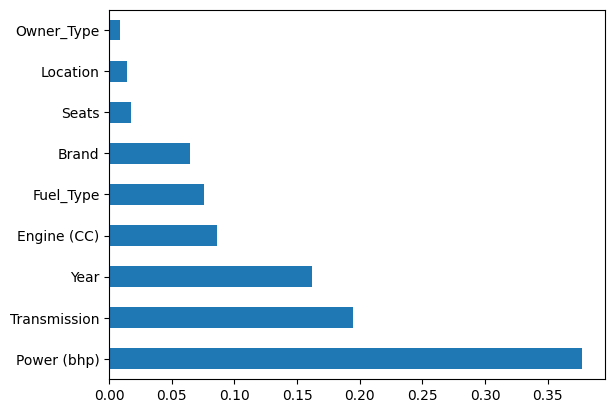

In [54]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
XGB_Model = XGBRegressor(max_depth=5,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Creating the model on Training Data
XGB = display_result(XGB_Model)
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

From the graph above, we can see that 4 most important variables for predicting the car price are Power, Transmission, Year and Fuel_Type

#Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
Forest_Reg = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

Forest_Model = display_result(Forest_Reg)


##### Model Validation and Accuracy Calculations ##########
RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
   Power (bhp)  Engine (CC)  Fuel_Type      Year     Brand  Transmission  \
0     0.238930     0.233235        0.5  0.761905  0.086957           0.0   
1     0.156872     0.206252        0.0  0.761905  0.043478           0.0   
2     0.097182     0.207053        0.0  0.619048  0.608696           0.0   
3     0.060380     0.050761        0.5  0.809524  0.043478           0.0   
4     0.250431     0.258349        0.5  0.761905  0.043478           0.0   
5     0.198390     0.260486        0.5  0.619048  0.043478           0.0   
6     0.264865     0.255944        0.0  0.666667  0.043478           0.0   
7     0.393329     0.629976        0.0  0.666667  0.217391           0.0   
8     0.246694     0.415442        0.0  0.571429  0.565217           0.0   
9     0.386141     0.629976        0.0  0.904762  0.217391           0.0   

   Owner_Type  Seats  L

# KNN Model

In [56]:
from sklearn.neighbors import KNeighborsRegressor
KNN_Model = KNeighborsRegressor(n_neighbors=3)

display_result(KNN_Model)


##### Model Validation and Accuracy Calculations ##########
KNeighborsRegressor(n_neighbors=3)
   Power (bhp)  Engine (CC)  Fuel_Type      Year     Brand  Transmission  \
0     0.238930     0.233235        0.5  0.761905  0.086957           0.0   
1     0.156872     0.206252        0.0  0.761905  0.043478           0.0   
2     0.097182     0.207053        0.0  0.619048  0.608696           0.0   
3     0.060380     0.050761        0.5  0.809524  0.043478           0.0   
4     0.250431     0.258349        0.5  0.761905  0.043478           0.0   
5     0.198390     0.260486        0.5  0.619048  0.043478           0.0   
6     0.264865     0.255944        0.0  0.666667  0.043478           0.0   
7     0.393329     0.629976        0.0  0.666667  0.217391           0.0   
8     0.246694     0.415442        0.0  0.571429  0.565217           0.0   
9     0.386141     0.629976        0.0  0.904762  0.217391           0.0   

   Owner_Type  Seats  Location  Price  Predicted Price  
0         

KNeighborsRegressor(n_neighbors=3)

#Model: XGBoost since it has highest accuracy

From graph plot, we can see the most important variables are: power (bhp), fuel_type, year, transmission

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = ['Fuel_Type', 'Transmission', 'Year', 'Power (bhp)']

X = DataForML_Numeric[Predictors].values

Y = DataForML_Numeric[TargetVariable].values


#PredictorScaler=StandardScaler()
MinMax = MinMaxScaler()

# Generating the standardized values of X
X = MinMax.fit_transform(X)

This second test using the same model with only 4 most important variables indicated by the graph.

In [58]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

#The parameters are different.
from xgboost import XGBRegressor
XGBoost = XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')
Display_Accuracy(XGBoost)


Accuracy values for 10-fold Cross Validation:
 [94.00194425 93.05506081 92.67021798 92.51915236 93.34402143 92.8941938
 93.53225673 92.86447598 93.94542354 93.16763394]

Final Average Accuracy of the model: 93.2


Since there is only few percentage difference, hence this model is good to be deployed and only 4 prediction variables are required to predict the price with high accuracy.
Therefore, we save the model as a file to later on use it within Python GUI.

In [65]:
Final_Model = XGBoost.fit(X,Y)

In [66]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWrite:
    pickle.dump(Final_Model, fileWrite)
    # Don't forget to close the filestream!
    fileWrite.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Capstone


These are the code used in data-processing above.

In [67]:
def convert_unit(value):
    parts = value.split()  # Split the string into parts based on whitespace
    if len(parts) == 2:
        numeric_part = float(parts[0])  # Extract the numeric part (convert to float)
        unit = parts[1]  # Extract the unit part
        if unit == 'km/kg':
            converted_value = numeric_part * 1.4  # Conversion factor from B to A
            return f"{converted_value:.2f} kmpl"  # Format the converted value with 'A' unit
    return value  # Return the original value if no conversion is needed


def remove_unit(data):
  data['Mileage (kmpl)'] = data['Mileage'].str.split(' ',expand=True)[0]
  data['Power (bhp)'] = data['Power'].str.split(' ',expand=True)[0]
  data['Engine (CC)'] = data['Engine'].str.split(' ',expand=True)[0]

  data['Mileage (kmpl)'] = data['Mileage (kmpl)'].astype(float)
  data['Power (bhp)'] = data['Power (bhp)'].astype(float)
  data['Engine (CC)'] = data['Engine (CC)'].astype(float)
  data = data.drop(['Mileage', 'Power', 'Engine'], axis=1)
  return data


def encode(data, brand, location):
    data_encoded = data.replace({
    'Owner_Type': {'First': 0, 'Second': 1,'Third':2,'Fourth & Above':3},
    'Transmission': {'Manual': 0, 'Automatic': 1},
    'Fuel_Type': {'Diesel': 0, 'Petrol': 1,'CNG':2,'LPG':3 ,'Electric':4 },
    'Brand': brand,
    'Location': location
})
    return data_encoded


These are the raw code using for data prediction, however they might differ from the GUI code since a more practical structure will be used for python IDE.

In [68]:
from re import IGNORECASE
import pandas as pd
import pickle
def FunctionPredictResult(InputData):
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML_Numeric.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors= ['Fuel_Type', 'Transmission', 'Year', 'Power (bhp)']

    # Generating the input values to the model
    X = InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X
    X = MinMax.transform(X)

    # Loading the Function from pickle file
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        XGB_Model = pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction = XGB_Model.predict(X)

    PredictionResult = pd.DataFrame(np.exp(Prediction)-1, columns=['Predicted Price'])

    return(PredictionResult)

In [71]:
NewSampleData = pd.DataFrame(data=[[0,1,2019, 80000],[2,0,2000, 70000]],columns=['Fuel_Type', 'Transmission', 'Year', 'Power (bhp)'])
Result = FunctionPredictResult(NewSampleData)

print(Result)

   Predicted Price
0         5.808149
1         5.159157


#Conclusion

The function FunctionPredictResult() is ready to used. But to integrate into GUI will requires modifications.

#Deploying into GUI using Tkinter
[link to github resporatory](https://github.com/MicH4e11/CapstoneProject.git)

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from xgboost import XGBRegressor
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


class CarPredictionApp:

    def __init__(self, master):
        self.master = master
        self.master.title('Car Price Prediction')

        #First read the data from Numeric file
        self.data = pd.read_pickle('DataForML_Numeric.pkl')
        self.Predictors = ['Fuel_Type', 'Transmission', 'Year', 'Power (bhp)']
        self.TargetVariable = 'Price'
        #The numeric file is then divided into predictors and price file as X and Y
        self.X = self.data.drop('Price', axis=1)
        self.X = self.X[self.Predictors].values
        self.Y = self.data['Price'].values
        #Split training for the model
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=0.2, random_state=42)

        #The model uses the same parameters and no normalisation since we're not using KNN or deep learning for this
        self.model = XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')
        self.model.fit(self.X_train, self.Y_train)
        self.create_widgets()


    def create_widgets(self):
        self.sliders = []
        self.combo = {}
        #This is to store the categorical data for creating the combo box
        self.Cat_Literal = {'Owner_Type':['First', 'Second','Third','Fourth & Above'],
                          'Transmission': ['Manual', 'Automatic'],
                          'Fuel_Type': ['Diesel', 'Petrol','CNG','LPG', 'Electric'],
                          'Year': [1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]}

        #For each column and cell inside data
        for i, column in enumerate(self.data.columns):
            if column in self.Predictors:
                #If it's power, which is the only continuous data inside the predictors
                #We make a slider
                if column == 'Power (bhp)':
                    label = tk.Label(self.master, text=column + ': ')
                    label.grid(row=i, column=0)
                    current_val_label = tk.Label(self.master, text='0.0')
                    current_val_label.grid(row=i, column=2)
                    #creating the slider with min/max value from the min/max of the power column
                    self.Pow_slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                                    command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
                    self.Pow_slider.grid(row=i, column=1)
                else:
                    label = tk.Label(self.master, text=column + ': ')
                    label.grid(row=i, column=0)
                    combo_box = ttk.Combobox(self.master, values=self.Cat_Literal[column]) #create combobox folowwing Categorical Literal dictionary
                    combo_box.current(0) #set combobox default value as first one
                    combo_box.grid(row=i, column=1)
                    self.combo[column] = combo_box
        #Otherwise, we make
        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns), columnspan=3)



    def Combo_Convert(self):
        #This is to store the categorical data for converting into data for processing
        self.Cat_Convert = {  'Owner_Type': {'First': 0, 'Second': 1,'Third':2,'Fourth & Above': 3},
                                'Transmission': {'Manual': 0, 'Automatic': 1},
                                'Fuel_Type': {'Diesel': 0, 'Petrol': 1,'CNG':2,'LPG':3, 'Electric': 4},
                            }
        output = []

        for column in self.combo:
            if column != 'Year':
                #get value of the combo box
                value = self.combo[column].get()
                #convert it using Cat_convert dictionary
                value = self.Cat_Convert[column][value]
                #add it to the combo value
                output.append(value)
            else:
                #If it's year, no need to convert, just
                value = int(self.combo[column].get())
                output.append(value)
        return output

    def predict_price(self):
        if self.Pow_slider.get() != 0.0:
            price = 0
            inputs = self.Combo_Convert() #get converted value from combo box
            inputs.append(float(self.Pow_slider.get())) #get the power value from slider
            print(inputs) #print the inputs for debugging
            price = self.model.predict([inputs], [])
            price = np.round(  np.exp(price) - 1 , decimals= 2)
            real_price = np.round(price * 100000)

            messagebox.showinfo('Predicted Price', f'The predicted price is {price[0]:.2f} Lakh = {real_price[0]:.0f} rupees')
        else:
            #if power is invalid(=0), print message
            messagebox.showinfo('Invalid','Invalid power scale, try again')


#Main loop
if __name__ == '__main__':
    root = tk.Tk()
    app = CarPredictionApp(root)
    root.mainloop()


#------ End of Project ------